In [42]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

from tqdm.notebook import tqdm

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['figure.dpi'] = 80
# matplotlib.rcParams['figure.figsize'] = [17, 4]
matplotlib.rcParams['axes.grid'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import sys
sys.path.insert(0, '../')

from lib_data import *
from lib_nn_dpe import NN_dpe

In [44]:
from dpe import DPE

dpe = DPE('COM9')
dpe.set_clock(50)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


....

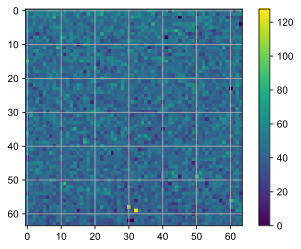

In [45]:
g = dpe.read(0, method='slow')
plt.imshow(g*1e6)
plt.colorbar()

In [46]:
Gtarget = np.zeros((64,64))
Gtarget[:,:] = 30e-6

Msel = np.ones((64,64))
# Msel[20:,20:] = 1
# Msel[Gtarget<4e-6] = 0

In [48]:
data = dpe.tune_conductance(0,  Gtarget, saveHistory=True, maxSteps=500, method='slow',
                           vSetRamp=[1, 3, 0.25], vGateSetRamp=[0.5, 1.4, 0.05],
                           vResetRamp=[0.3, 1.5, 0.05], vGateResetRamp=[5.0, 5.5, 0.5], 
                           Twidth=10e-6, TwidthReset=1e-3,  Msel=Msel, Gtol_in=10e-6, Gtol_out=20e-6, numReads=3)

Start programming, step=0, maxBound=0 yield= 32.47% - 72.39%
2766.0 devices to be programmed...reset 2714.0, set 52.0
Setting 52 devices...
Programming with external timing Twidth=10.000 us
Resetting 2714 devices...
Programming with external timing Twidth=1000.000 us
...

KeyboardInterrupt: 

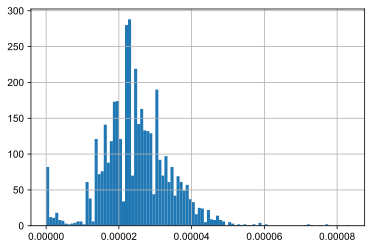

In [34]:
_ = plt.hist(g.reshape(-1), 100)

In [49]:

Gtarget = np.zeros((64,64))
Gtarget[:,:] = 50e-6

Msel = np.ones((64,64))
# Msel[20:,20:] = 1
# Msel[Gtarget<4e-6] = 0

In [50]:
data = dpe.tune_conductance(0,  Gtarget, saveHistory=True, maxSteps=1000, method='slow',
                           vSetRamp=[1, 3, 0.25], vGateSetRamp=[0.5, 1.4, 0.05],
                           vResetRamp=[0.3, 1.5, 0.05], vGateResetRamp=[5.0, 5.5, 0.5], 
                           Twidth=10e-6, TwidthReset=1e-3,  Msel=Msel, Gtol_in=10e-6, Gtol_out=20e-6, numReads=1)

Start programming, step=759, maxBound=6 yield= 78.15% - 99.80%
3.0 devices to be programmed...reset 3.0, set 6.0
Setting 0 devices...
Programming with external timing Twidth=10.000 us
Resetting 3 devices...
Programming with external timing Twidth=1000.000 us
..------------------------------
Programming completed.


## Save the g after the first slow mode programming.

In [9]:
save_workspace({'g':g}, note='first_slow_g')

Saving g(<class 'numpy.ndarray'>), to 20200615-115323-first_slow_g.pkl
Saving g(<class 'numpy.ndarray'>), to 20200615-115323-first_slow_g.mat


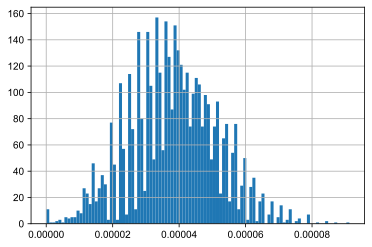

In [10]:
_ = plt.hist(g.reshape(-1), 100)

save_workspaced programming

In [12]:
save_workspace(vars(), note='second_slow_prog_data')

Saving In(<class 'list'>), Out(<class 'dict'>), g(<class 'numpy.ndarray'>), Gtarget(<class 'numpy.ndarray'>), Msel(<class 'numpy.ndarray'>), data(<class 'dict'>), to 20200615-115412-second_slow_prog_data.pkl
Saving In(<class 'list'>), g(<class 'numpy.ndarray'>), Gtarget(<class 'numpy.ndarray'>), Msel(<class 'numpy.ndarray'>), to 20200615-115412-second_slow_prog_data.mat


....

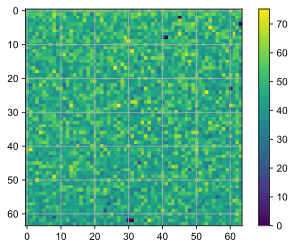

In [51]:
g = dpe.read(0, method='slow')
plt.imshow(g*1e6)
plt.colorbar()

(0, 100)

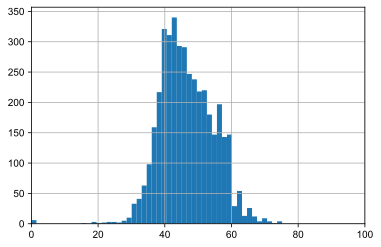

In [52]:
_ = plt.hist(g.reshape(-1)*1e6, 50)
plt.xlim(0, 100)

In [53]:
g_diff = g[:, ::2] - g[:, 1::2]

(-50, 50)

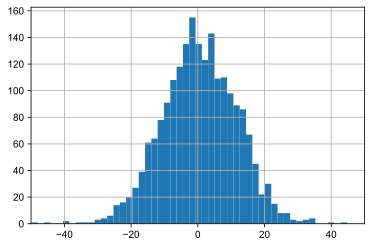

In [54]:
_ = plt.hist(g_diff.reshape(-1)*1e6, 50)
plt.xlim(-50, 50)

## Kill stuck ON

In [37]:
data = dpe.tune_conductance(0,  Gtarget, saveHistory=True, maxSteps=100, method='slow',
                           vSetRamp=[1, 3, 0.25], vGateSetRamp=[0.5, 1.4, 0.05],
                           vResetRamp=[0.3, 1.5, 0.05], vGateResetRamp=[5.0, 5.5, 0.5], 
                           Twidth=10e-6, TwidthReset=1e-3,  Msel=Msel, Gtol_in=100e-6, Gtol_out=200e-6, numReads=1)

Start programming, step=12, maxBound=0 yield= 99.98% - 100.00%
1.0 devices to be programmed...reset 1.0, set 0.0
Setting 0 devices...
Programming with external timing Twidth=10.000 us
Resetting 1 devices...
Programming with external timing Twidth=1000.000 us
..------------------------------
Programming completed.


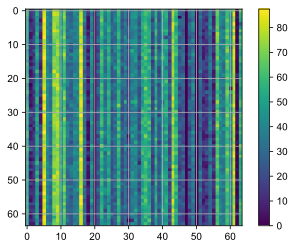

In [55]:
g_fast = dpe.read(0, method='fast')
plt.imshow(g_fast*1e6)
plt.colorbar()